<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откройте-файлы-и-изучите-их." data-toc-modified-id="Откройте-файлы-и-изучите-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откройте файлы и изучите их.</a></span></li><li><span><a href="#Расчёт-эффективности" data-toc-modified-id="Расчёт-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчёт эффективности</a></span></li><li><span><a href="#Анализ-признаков-выборок" data-toc-modified-id="Анализ-признаков-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков выборок</a></span></li><li><span><a href="#Проведем-предобработку-данных." data-toc-modified-id="Проведем-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


**Описание данных**


Технологический процесс:

 * Rougher feed — исходное сырье

 * Rougher additions (или reagent additions)
 
Флотационные реагенты:

   Xanthate, Sulphate, Depressant:

   - Xanthate — ксантогенат (промотер, или активатор флотации);

   - Sulphate — сульфат (на данном производстве сульфид натрия);

   - Depressant — депрессант (силикат натрия).

 * Rougher process (англ. «грубый процесс») — флотация

 * Rougher tails — отвальные хвосты

 * Float banks — флотационная установка

 * Cleaner process — очистка

 * Rougher Au — черновой концентрат золота

 * Final Au — финальный концентрат золота

Параметры этапов:

 * air amount — объём воздуха

 * fluid levels — уровень жидкости

 * feed size — размер гранул сырья

 * feed rate — скорость подачи

**План работы.**

1.Подготовить данные
 
1.1. Открыть файлы и изучить их.

1.2. Проверить, что эффективность обогащения рассчитана правильно. 

Вычислить её на обучающей выборке для признака rougher.output.recovery.

Найти MAE между расчётами и значением признака. Описать выводы.

1.3. Проанализировать признаки, недоступные в тестовой выборке. (Что это за параметры? К какому типу относятся?)

1.4. Провести предобработку данных.

2.Проанализировать данные

2.1. Посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опиcсать выводы.

2.2.  Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. 
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

2.3. Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

3.Построить модель

3.1. Написать функцию для вычисления итоговой sMAPE.

3.2. Обучить разные модели и оцените их качество. Выбрать лучшую модель и проверить её на тестовой выборке. Описать выводы.


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

### Откройте файлы и изучите их.

Импортируем файлы с данными и запишим их в переменные.

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # обучающая выборка
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # тестовая выборка
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') # исходные данные

In [3]:
# проверка размера выборок
df_full.shape[0], df_train.shape[0], df_test.shape[0]

(19439, 14149, 5290)

In [4]:
round(df_test.shape[0] / df_full.shape[0] *100)# выведем процентное соотношение тестовой выборки к исхоным данным

27

In [5]:
round(df_train.shape[0] / df_full.shape[0] *100)# выведем процентное соотношение обучающей выюорки к исхоным данным

73

Исходные данные разделены на обучающую и тестовую выборки в соотношении 73% к 27%. Что составляет примерно 3 к 1.

In [6]:
# выведем информацию о таблицах
print('Обучающая выборка')
print()
display(df_train.info())
print()
print('Тестовая выборка')
print()
display(df_test.info())
print()
print('Исходные данные')
print()
display(df_full.info())
print()

Обучающая выборка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144

None


Тестовая выборка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float6

None


Исходные данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 

None

In [7]:
df_train.head(10).T# посмотрим 10 первых строк обучающей выборки

,0,1,2,3,4,5,6,7,8,9
date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00,2016-01-15 05:00:00,2016-01-15 06:00:00,2016-01-15 07:00:00,2016-01-15 08:00:00,2016-01-15 09:00:00
final.output.concentrate_ag,6.055403,6.029369,6.055926,6.047977,6.148599,6.482968,6.533849,6.130823,5.83414,5.687063
final.output.concentrate_pb,9.889648,9.968944,10.213995,9.977019,10.142511,10.049416,10.058141,9.935481,10.071156,9.980404
final.output.concentrate_sol,5.507324,5.257781,5.383759,4.858634,4.939416,5.480257,4.5691,4.389813,4.876389,5.282514
final.output.concentrate_au,42.19202,42.701629,42.657501,42.689819,42.774141,41.633678,41.995316,42.452727,43.404078,43.23522
...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.310211,-500.169983,-500.129135,-499.20164,-501.686727,-496.374715,-497.08318,-499.171928,-501.178133,-502.986357
secondary_cleaner.state.floatbank5_b_air,8.079666,7.984757,8.013877,7.977324,7.894242,7.965083,8.01089,7.993381,7.881604,7.979219
secondary_cleaner.state.floatbank5_b_level,-500.470978,-500.582168,-500.517572,-500.255908,-500.356035,-499.364752,-500.002423,-499.794518,-499.729434,-500.146835
secondary_cleaner.state.floatbank6_a_air,14.151341,13.998353,14.028663,14.005551,13.996647,14.017067,14.029649,13.984498,13.967135,13.981614


In [8]:
df_test.head(10).T# посмотрим 10 первых строк тестовой выборки

,0,1,2,3,4,5,6,7,8,9
date,2016-09-01 00:59:59,2016-09-01 01:59:59,2016-09-01 02:59:59,2016-09-01 03:59:59,2016-09-01 04:59:59,2016-09-01 05:59:59,2016-09-01 06:59:59,2016-09-01 07:59:59,2016-09-01 08:59:59,2016-09-01 09:59:59
primary_cleaner.input.sulfate,210.800909,215.392455,215.259946,215.336236,199.099327,168.485085,144.13344,133.513396,133.735356,126.961069
primary_cleaner.input.depressant,14.993118,14.987471,12.884934,12.006805,10.68253,8.817007,7.92461,8.055252,7.999618,8.017856
primary_cleaner.input.feed_size,8.08,8.08,7.786667,7.64,7.53,7.42,7.42,6.988,6.935,7.03
primary_cleaner.input.xanthate,1.005021,0.990469,0.996043,0.863514,0.805575,0.791191,0.788838,0.801871,0.789329,0.805298
primary_cleaner.state.floatbank8_a_air,1398.981301,1398.777912,1398.493666,1399.618111,1401.268123,1402.826803,1398.252401,1401.669677,1402.358981,1400.81612
primary_cleaner.state.floatbank8_a_level,-500.225577,-500.057435,-500.86836,-498.863574,-500.808305,-499.299521,-499.748672,-501.777839,-499.981597,-499.014158
primary_cleaner.state.floatbank8_b_air,1399.144926,1398.055362,1398.860436,1397.44012,1398.128818,1401.511119,1393.255503,1400.754446,1400.985954,1399.975401
primary_cleaner.state.floatbank8_b_level,-499.919735,-499.778182,-499.764529,-499.211024,-499.504543,-499.205357,-499.19538,-502.514024,-496.802968,-499.570552
primary_cleaner.state.floatbank8_c_air,1400.102998,1396.151033,1398.075709,1400.129303,1402.172226,1404.088107,1396.738566,1400.465244,1401.168584,1401.871924


In [9]:
df_full.head(10).T# посмотрим 10 первых строк исходных данных

,0,1,2,3,4,5,6,7,8,9
date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00,2016-01-15 05:00:00,2016-01-15 06:00:00,2016-01-15 07:00:00,2016-01-15 08:00:00,2016-01-15 09:00:00
final.output.concentrate_ag,6.055403,6.029369,6.055926,6.047977,6.148599,6.482968,6.533849,6.130823,5.83414,5.687063
final.output.concentrate_pb,9.889648,9.968944,10.213995,9.977019,10.142511,10.049416,10.058141,9.935481,10.071156,9.980404
final.output.concentrate_sol,5.507324,5.257781,5.383759,4.858634,4.939416,5.480257,4.5691,4.389813,4.876389,5.282514
final.output.concentrate_au,42.19202,42.701629,42.657501,42.689819,42.774141,41.633678,41.995316,42.452727,43.404078,43.23522
...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.310211,-500.169983,-500.129135,-499.20164,-501.686727,-496.374715,-497.08318,-499.171928,-501.178133,-502.986357
secondary_cleaner.state.floatbank5_b_air,8.079666,7.984757,8.013877,7.977324,7.894242,7.965083,8.01089,7.993381,7.881604,7.979219
secondary_cleaner.state.floatbank5_b_level,-500.470978,-500.582168,-500.517572,-500.255908,-500.356035,-499.364752,-500.002423,-499.794518,-499.729434,-500.146835
secondary_cleaner.state.floatbank6_a_air,14.151341,13.998353,14.028663,14.005551,13.996647,14.017067,14.029649,13.984498,13.967135,13.981614


**Вывод:**

Во всех датасетах есть пропуски. Тестовая выборка содержит меньшее количество столбцов (52 признака), чем исходные данные и обучающая выборка (по 87 признаков). Далее изучим это подробнее и определим что с этим делать.Все признаки количественные.
Исходные данные (19439 объектов) разделены на обучающую (14149 объектов) и тестовую (5290 объектов) выборки в соотношении 73% к 27% . Что составляет ~ 3:1.


### Расчёт эффективности

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

Эффективность обогащения рассчитывается по формуле:
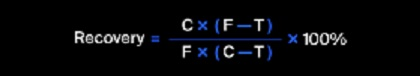
где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

In [10]:
#создадим функцию для расчета эффективности
def recovary(row):
    c = row['rougher.output.concentrate_au']# количество золота в концентрате после флотации/очистки
    f = row['rougher.input.feed_au']# количество золота в сырье/концентрате до флотации/очистки
    t = row['rougher.output.tail_au']# колчество в отвальных хвостах после флотации/очистки
    a = c * (f - t)
    b = f * (c - t)
    return a / b * 100

Чтобы сделать расчет, удалим все строки с пропущенными значениями.

In [11]:
#создадим копию обучающей выборки удалив в нем пропуски
df_train_drop = df_train.dropna().copy()
# создадим новый столбец с расчетами MAE (средняя абсолютная ошибка) по каждой строке
df_train_drop['new'] = df_train_drop.apply(lambda x: recovary(x), axis =  1)


In [12]:
df_train_drop.shape

(11017, 88)

In [13]:
mae = mean_absolute_error(df_train_drop['new'], df_train_drop['rougher.output.recovery'])
mae

9.82970122149377e-15

MAE чрезвычайно малое число.
Ошибка минимальна, эффективность обогащения рассчитана правильно.

### Анализ признаков выборок

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [15]:
# cравним выборки.
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(14149, 87)
(5290, 53)
(19439, 87)


В обучающей выборке больше столбцов с признаками, чем в тестовой, изучим недостающие признаки.

In [16]:
# создадим список с названиями признаков, отсутствующих в тестовой выборке
left_features = sorted(list(set(df_train.columns) - set(df_test.columns)))

print(f'В тестовой выборке отсутствуют {len(left_features)} признака:\n')
for feature in sorted(left_features):
    print(feature)

В тестовой выборке отсутствуют 34 признака:

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
second

**Вывод:**

- В тестовой выборке отсутствуют 34 признака, обнаруженные в обучающей и исходной выборках. Согласно пояснению к задаче, данные индексируются на основе атрибута даты, указывающего, когда информация была получена.

Эти признаки относятся к типу параметра "output - Параметры продукта", calculation - "Расчётные характеристики":

Этап "final - Финальные характеристики"

Тип параметра output - параметры продукта:

'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au' Этап primary_cleaner - первичная очистка:

Тип параметра output - параметры продукта:

'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',

Этап rougher - флотация:

Тип параметра calculation - расчётные характеристики: 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio'

Тип параметра output - параметры продукта:

'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',

- Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже, их использовать для прогноза нельзя так как это утечка данных. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. 

- Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.



### Проведем предобработку данных.

In [17]:
# подсчитаем количество пропусков во всех выборках
print('Колличество пропусков в исходных данных:', df_full.isnull().sum().sum())
print('Колличество пропусков в обучающей выборке:', df_train.isnull().sum().sum())
print('Колличество пропусков в тестовой выборке:', df_test.isnull().sum().sum())

Колличество пропусков в исходных данных: 4481
Колличество пропусков в обучающей выборке: 4100
Колличество пропусков в тестовой выборке: 90


In [18]:
# проверим на наличие дубликатов наши данные
print('Количество дубликатов в исходных данных:', df_full.duplicated().sum())
print('Количество дубликатов в обучающей выборке:', df_train.duplicated().sum())
print('Количество дубликатов в тестовой выборке:', df_test.duplicated().sum())

Количество дубликатов в исходных данных: 0
Количество дубликатов в обучающей выборке: 0
Количество дубликатов в тестовой выборке: 0


**Подготовка тренировочной выборки**

Элементы выборок упорядочены по датам, а схожие параметры зачастую близки по времени. Таким образом, мы можем значительно упростить процесс замены пропущенных значений, используя метод fillna с аргументом ffill. Этот подход предполагает замену отсутствующих значений значениями ближайших соседей.

In [19]:
train = df_train.fillna(method='ffill') # заполняем пропуски из предыдущей строки
features_train = train.drop(train.columns.drop(df_test.columns), axis =1) # удаляем столбцы, отсутствующие в тестовой выборке
features_train = features_train.set_index('date') # заменяем индексы датой

In [20]:
target_train_final = train['final.output.recovery'] # целевой признак тренировочной выборки 
target_train_rougher = train['rougher.output.recovery'] # целевой признак тренировочной выборки

In [21]:
print(target_train_rougher.shape)
print(target_train_final.shape)
print(features_train.shape)

(14149,)
(14149,)
(14149, 52)


In [22]:
print('Колличество пропусков в обучающей выборке:', train.isnull().sum().sum())

Колличество пропусков в обучающей выборке: 0


**Подготовка тестовой выборки**

In [23]:
# заполняем пропуски из предыдущей строки
test = df_test.fillna(method='ffill')

In [24]:
# добавим целевой признак в test из full
test_merged = test.merge(df_full[['date','final.output.recovery','rougher.output.recovery']], on = 'date') 

In [25]:
# заменяем индексы датой
test_merged = test_merged.set_index('date') 
# удаляем целевые признаки
features_test = test_merged.drop(['final.output.recovery','rougher.output.recovery'],axis =1)  


In [26]:
target_test_final = test_merged['final.output.recovery']  # целевой признак тестовой выборки
target_test_rougher = test_merged['rougher.output.recovery']  # целевой признак тестовой выборки

In [27]:
# проверим размеры тестовой выборки
print(target_test_rougher.shape)
print(target_test_final.shape)
print(features_test.shape)

(5290,)
(5290,)
(5290, 52)


In [28]:
full = df_full.fillna(method='ffill') # заполним пропуски соседними значениями

**Выводы:**

-Эффективность обогащения рассчитана правильно.

-Пропуски заполнены соседними значениям.

-Из тренировочной и тестовой выборок удалены столбцы, которые могли способствовать некорректному обучению модели и ошибочным предсказаниям.

-Данные готовы для дальнейшего анализа и прогноза.

## Анализ данных

**Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки**.

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
Проанализируем значения концентрации металлов на разных этапах обработки. Поскольку в тестовой базе часть данных отсутствует сделаем это на основе учебной выборки.

In [29]:
#необходимо проанализировать изменения концентрации Au, Ag и Pb. 
#чтобы не выбирать вручную нужные нам концентрации, отберем их по названию металла в столбцах исходных данных.
# отберем столбцы
df_full.columns[df_full.columns.str.contains('au')].to_list,\
df_full.columns[df_full.columns.str.contains('ag')].to_list,\
df_full.columns[df_full.columns.str.contains('pb')].to_list

(<bound method IndexOpsMixin.tolist of Index(['final.output.concentrate_au', 'final.output.tail_au',
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.tail_au',
        'rougher.calculation.sulfate_to_au_concentrate',
        'rougher.calculation.floatbank10_sulfate_to_au_feed',
        'rougher.calculation.floatbank11_sulfate_to_au_feed',
        'rougher.calculation.au_pb_ratio', 'rougher.input.feed_au',
        'rougher.output.concentrate_au', 'rougher.output.tail_au',
        'secondary_cleaner.output.tail_au'],
       dtype='object')>,
 <bound method IndexOpsMixin.tolist of Index(['final.output.concentrate_ag', 'final.output.tail_ag',
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.tail_ag', 'rougher.input.feed_ag',
        'rougher.output.concentrate_ag', 'rougher.output.tail_ag',
        'secondary_cleaner.output.tail_ag'],
       dtype='object')>,
 <bound method IndexOpsMixin.tolist of Index(['final.output.concentr

В качестве исходной концентрации будем рассматривать столбцы:

* rougher.input.feed_au;
* rougher.input.feed_ag;
* rougher.input.feed_pb.

После этапа флотации будем рассматривать столбцы:

* rougher.output.concentrate_au;
* rougher.output.concentrate_ag;
* rougher.output.concentrate_pb.

После этапа первой очистки будем рассматривать столбцы:

* primary_cleaner.output.concentrate_au;
* primary_cleaner.output.concentrate_ag;
* primary_cleaner.output.concentrate_pb.

После этапа второй очистки будем рассматривать столбцы:

* final.output.concentrate_au;
* final.output.concentrate_ag;
* final.output.concentrate_pb.

In [30]:
print("Концентрация золота (Au) на разных этапах")
print(
    train[['rougher.input.feed_au',
           'rougher.output.concentrate_au',
          'primary_cleaner.output.concentrate_au',
          'final.output.concentrate_au' 
          ]].mean()
)
print()
print("Концентрация серебра (Ag) на разных этапах")
print(
    train[['rougher.input.feed_ag',
          'rougher.output.concentrate_ag',
          'primary_cleaner.output.concentrate_ag',
           'final.output.concentrate_ag']].mean()
)
print()
print("Концентрация свинца (Pb) на разных этапах")
print(
    train[['rougher.input.feed_pb',
        'rougher.output.concentrate_pb',          
        'primary_cleaner.output.concentrate_pb',
        'final.output.concentrate_pb']].mean()
)


Концентрация золота (Au) на разных этапах
rougher.input.feed_au                     7.866577
rougher.output.concentrate_au            19.439958
primary_cleaner.output.concentrate_au    32.386836
final.output.concentrate_au              44.003792
dtype: float64

Концентрация серебра (Ag) на разных этапах
rougher.input.feed_ag                     8.579195
rougher.output.concentrate_ag            11.775812
primary_cleaner.output.concentrate_ag     8.200916
final.output.concentrate_ag               5.141921
dtype: float64

Концентрация свинца (Pb) на разных этапах
rougher.input.feed_pb                     3.505465
rougher.output.concentrate_pb             7.664555
primary_cleaner.output.concentrate_pb     9.568544
final.output.concentrate_pb              10.132848
dtype: float64


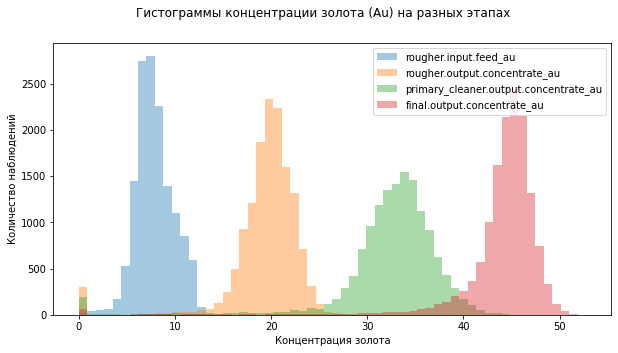

In [31]:
train[['rougher.input.feed_au',
           'rougher.output.concentrate_au',
          'primary_cleaner.output.concentrate_au',
          'final.output.concentrate_au'  ]].plot(kind = 'hist', figsize = (10, 5), bins=60, alpha = 0.4)
plt.suptitle("Гистограммы концентрации золота (Au) на разных этапах")
plt.xlabel("Концентрация золота")
plt.ylabel("Количество наблюдений")
plt.show()

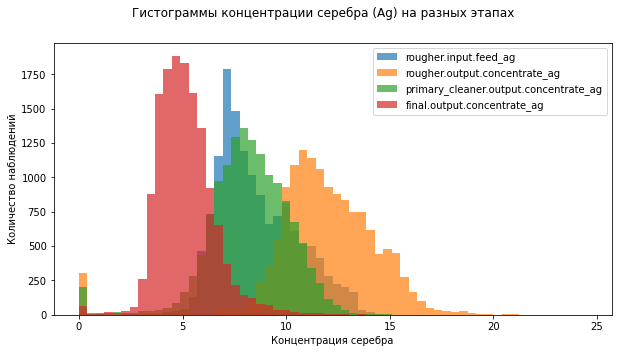

In [32]:
train[['rougher.input.feed_ag',
          'rougher.output.concentrate_ag',
          'primary_cleaner.output.concentrate_ag',
           'final.output.concentrate_ag']].plot(kind = 'hist', figsize = (10, 5), bins=60, alpha = 0.7)
plt.suptitle("Гистограммы концентрации серебра (Ag) на разных этапах")
plt.xlabel("Концентрация серебра")
plt.ylabel("Количество наблюдений")
plt.show()

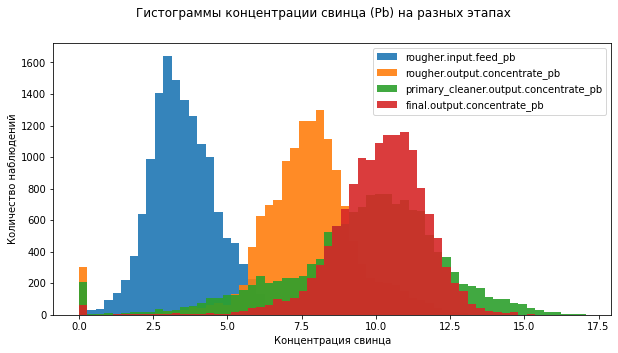

In [33]:
train[['rougher.input.feed_pb',
        'rougher.output.concentrate_pb',          
        'primary_cleaner.output.concentrate_pb',
        'final.output.concentrate_pb']].plot(kind = 'hist', figsize = (10, 5), bins=60, alpha = 0.9)
plt.suptitle("Гистограммы концентрации свинца (Pb) на разных этапах")
plt.xlabel("Концентрация свинца")
plt.ylabel("Количество наблюдений")
plt.show()

**Вывод:**

Концентрация металлов в процессе очистки изменяется:

 - Концентрация золота повышается
 - Концентрация серебра после флотации растет, а затем снижается
 - Концентрация свинца повышается
 
Так же заметно отделение золота от других металлов.

На каждом этапе очистки количество золота, как и ожидалось, увеличивается. Доля серебра снижается, а свинец в концентрате остается примерно постоянным. Однако, поскольку в конечном концентрате существенно увеличивается доля золота, вполне вероятно, что фактическое количество свинца уменьшится, причем его доля окажется больше за счет уменьшения других веществ. Также на графиках видны аномалии - околонулевые значения. В руде не может быть нулевых значений концентрации металла на любой стадии очистки, так как это руда. Обработаем их позже.

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

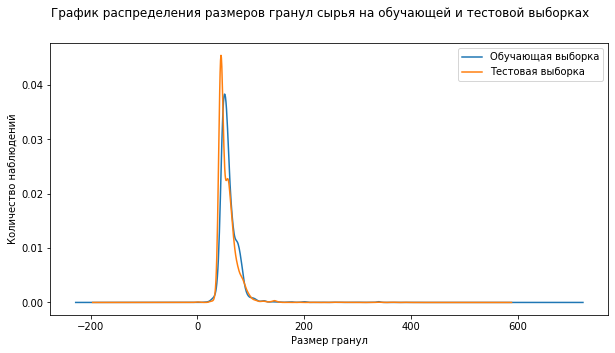

In [34]:
#построим графики
train['rougher.input.feed_size'].plot.kde(legend = True, label = 'Обучающая выборка', figsize = (10, 5))
test['rougher.input.feed_size'].plot.kde(legend = True, label = 'Тестовая выборка', figsize = (10, 5))
plt.suptitle("График распределения размеров гранул сырья на обучающей и тестовой выборках")
plt.xlabel("Размер гранул")
plt.ylabel("Количество наблюдений")
plt.show()

Распределение размера гранул сырья на тестовой и обучающей выборках практически идентичны. Это видно по графику.Оценки модели будут верны.

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [35]:
# суммируем концентрацию всех веществ на разных стадиях
rougher_input_feed = train[['rougher.input.feed_ag','rougher.input.feed_pb',
                           'rougher.input.feed_sol','rougher.input.feed_au']].T.sum()
rougher_output_concentrate = train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                                   'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].T.sum()
final_output_concentrate = train[['final.output.concentrate_ag','final.output.concentrate_pb',
                                 'final.output.concentrate_sol','final.output.concentrate_au']].T.sum()

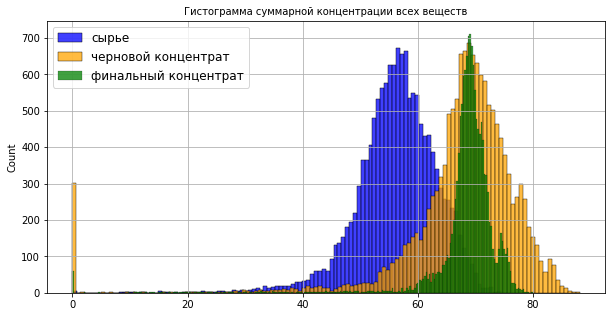

In [36]:
# построим гистограмму
plt.figure(figsize=(10, 5))
plt.title('Гистограмма суммарной концентрации всех веществ', fontsize = 10)
sns.histplot(rougher_input_feed, color='blue')
sns.histplot(rougher_output_concentrate, color='orange')
sns.histplot(final_output_concentrate, color = 'green')
plt.legend(['сырье', 'черновой концентрат', 'финальный концентрат'], fontsize = 12)
plt.grid()
plt.show()

Нулевая концентрация веществ на протяжении всего процесса очистки кажется аномальной, поскольку в ходе технологических процессов это маловероятно. Многие значения около 0 существуют как в начальном концентрате, а также в конечном. Необходимо исключить эти значения, чтобы повысить точность прогнозирования модели. Эту корректировку следует применять ко всем выбокам, после чего следует сделать корректировку признаков.

In [37]:
# удалим выбросы
df_full.query('`rougher.input.feed_ag` > 1 & `rougher.input.feed_pb` > 1 & \
            `rougher.input.feed_sol` > 1 & `rougher.input.feed_au` > 1 & \
            `rougher.output.concentrate_ag` > 1 & `rougher.output.concentrate_pb` > 1 & \
            `rougher.output.concentrate_sol` > 1 & `rougher.output.concentrate_au` > 1 & \
            `final.output.concentrate_ag` > 1 & `final.output.concentrate_pb` > 1 & \
            `final.output.concentrate_sol` > 1 & `final.output.concentrate_au` > 1', inplace = True)
# удалим выбросы
train.query('`rougher.input.feed_ag` > 1 & `rougher.input.feed_pb` > 1 & \
            `rougher.input.feed_sol` > 1 & `rougher.input.feed_au` > 1 & \
            `rougher.output.concentrate_ag` > 1 & `rougher.output.concentrate_pb` > 1 & \
            `rougher.output.concentrate_sol` > 1 & `rougher.output.concentrate_au` > 1 & \
            `final.output.concentrate_ag` > 1 & `final.output.concentrate_pb` > 1 & \
            `final.output.concentrate_sol` > 1 & `final.output.concentrate_au` > 1', inplace = True)
# удалим выбросы
test.query('`rougher.input.feed_ag` > 1 & `rougher.input.feed_pb` > 1 & \
            `rougher.input.feed_sol` > 1 & `rougher.input.feed_au` > 1', inplace = True)

In [38]:
#снова определим переменные для проверки
rougher_input_feed = train[['rougher.input.feed_ag','rougher.input.feed_pb',
                           'rougher.input.feed_sol','rougher.input.feed_au']].T.sum()
rougher_output_concentrate = train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                                   'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].T.sum()
final_output_concentrate = train[['final.output.concentrate_ag','final.output.concentrate_pb',
                                 'final.output.concentrate_sol','final.output.concentrate_au']].T.sum()

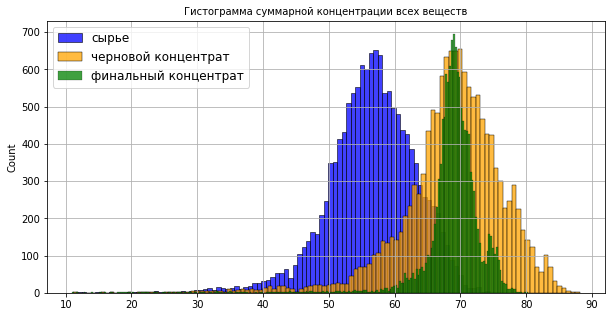

In [39]:
#построим гистограмму
plt.figure(figsize=(10,5))
plt.title('Гистограмма суммарной концентрации всех веществ', fontsize = 10)
sns.histplot(rougher_input_feed, color='blue')
sns.histplot(rougher_output_concentrate, color='orange')
sns.histplot(final_output_concentrate, color = 'green')
plt.legend(['сырье', 'черновой концентрат', 'финальный концентрат'], fontsize = 12)
plt.grid()
plt.show()

Подготовим и скорректируем даннные без нулевых значений

In [40]:
 # удалим столбцы, отсутствующие в тестовой выборке
features_train = train.drop(train.columns.drop(test.columns), axis =1)
features_train = features_train.set_index('date') # заменим индексы датой

In [41]:
target_train_final = train['final.output.recovery'] # целевой признак тренировочной выборки
target_train_rougher = train['rougher.output.recovery'] # целевой признак тренировочной выборки

In [42]:
# добавим целевые признаки
test_merged = test.merge(full[['date','final.output.recovery','rougher.output.recovery']], on = 'date')

In [43]:
test_merged = test_merged.set_index('date') # заменим индексы датой
features_test = test_merged.drop(['final.output.recovery','rougher.output.recovery'],axis =1)
# удалим целевые признаки

In [44]:
target_test_final = test_merged['final.output.recovery'] # целевой признак тестовой выборки
target_test_rougher = test_merged['rougher.output.recovery'] # целевой признак тестовой выборки

In [45]:
# проверка размеров тренировочной выборки
print(target_train_rougher.shape)
print(target_train_final.shape)
print(features_train.shape)

(13542,)
(13542,)
(13542, 52)


In [46]:
# проверка размеров тестовой выборки
print(target_test_rougher.shape)
print(target_test_final.shape)
print(features_test.shape)

(5276,)
(5276,)
(5276, 52)


**Вывод:**

В результате анализа были изучены:

- Концетрации основных веществ на разных этапах очистки. 

Концентрация металлов в процессе очистки изменяется:

Концентрация золота повышается
Концентрация серебра снижается
Концентрация свинца повышается

- Размер гранул тестовой и обучающей выборки.

Распределение размера гранул сырья на тестовой и обучающей выборках практически идентичны. Оценки модели будут верны.

- Суммарная концентрация веществ.

Обнаружены аномалии в виде нулевых значений. Чего по сути не может быть.Так как в руде всегда есть определенное количество вещества.

- Аномалии удалены.

Данные подготовлены для обучения.


## Модель

Функция для вычисления итоговой sMAPE
Нам понадобится вычислять значение sMAPE для 2 целевых признаков - это наши метрики качества. Запишем функцию для вычисления sMAPE:

In [47]:
def sMAPE(target, prediction): # напишем функцию для расчета процента ошибки модели
    error = 2*abs(target - prediction)/(abs(target)+abs(prediction))
    error = error.mean()*100
    return error

def sMape_scorer(estimator, X, y): 
    sMAPE_scorer = make_scorer(sMAPE, more_is_better=False, greater_is_better=False)
    return sMAPE(y, estimator.predict(X))

In [48]:
# КОД РЕВЬЮЕРА
from sklearn.model_selection import GridSearchCV

dtr_params = {'max_depth': range(1, 10)}
smape_scorer = make_scorer(sMAPE, greater_is_better=False)
dtr_grid = GridSearchCV(DecisionTreeRegressor(random_state=12345), dtr_params, scoring=smape_scorer)
dtr_grid.fit(features_train,target_train_rougher)
dtr_grid.best_score_

-7.216920171846955

In [1]:

from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [57]:
#напишем функцию и цикл для подбора лучших параметров моделей линейной регрессии, модели случайный лес, и дерево решений.
def models(features,target):
    model = LinearRegression()
    score = cross_val_score(model, features, target, scoring=sMape_scorer, cv=4).mean()
    print("sMAPE модели LinearRegression:", score)

    
    min_score = 10000
    best_depth = 0
    for depth in range(1, 12, 2):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
        score = cross_val_score(model, features,target, scoring=sMape_scorer, cv=4).mean()
        if score < min_score:
            min_score = score
            best_depth = depth
    print("sMAPE наилучшей модели DecisionTreeRegressor:", min_score, "Глубина дерева:", best_depth)
    
    
    min_score = 10000
    best_est = 0
    best_depth = 0
    # for est in range(50, 102, 10):
    for est in range(50, 102, 25): # ВМЕШАТЕЛЬСТВО РЕВЬЮЕРА: просто чтобы код побыстрее работал :)
        for depth in tqdm(range (2, 10,2)): # ВМЕШАТЕЛЬСТВО РЕВЬЮЕРА: прогрес бар
            model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            score = cross_val_score(model, features,target, scoring=sMape_scorer, cv=4).mean()
            if score < min_score:
                min_score = score
                best_depth = depth
                best_est = est
    print("sMAPE наилучшей модели RandomForestRegressor:", min_score, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)
    

In [58]:
models(features_train,target_train_rougher)# определим лучшие модели для целевой rougher

sMAPE модели LinearRegression: 7.5781627251460435
sMAPE наилучшей модели DecisionTreeRegressor: 7.392964218444393 Глубина дерева: 5


100%|██████████| 4/4 [05:26<00:00, 81.54s/it]

sMAPE наилучшей модели RandomForestRegressor: 7.303355126424838 Количество деревьев: 100 Глубина дерева: 6


Лучшие параметры для целевой rougher оказались у Случайного леса (7.3), с количеством деревьев - 100 и глубиной - 6 

In [59]:
models(features_train, target_train_final)#лучшие результаты для целевой final

sMAPE модели LinearRegression: 10.703654950751728
sMAPE наилучшей модели DecisionTreeRegressor: 10.070842922763648 Глубина дерева: 1


100%|██████████| 4/4 [05:23<00:00, 80.94s/it]

sMAPE наилучшей модели RandomForestRegressor: 9.471761093814298 Количество деревьев: 100 Глубина дерева: 2


Лучшие параметры (9.5) для целевой final: Случайный лес с количеством деревьев - 100, глубиной -2 

**Проверка модели на адекватность с помощью наивной модели**

In [60]:
dummy_r = DummyRegressor(strategy="mean")
score = cross_val_score(dummy_r, features_train, target_train_rougher, scoring=sMape_scorer, cv=4).mean()
print("sMAPE наивной модели:", score)

sMAPE наивной модели: 8.00680228135859


In [61]:
dummy_r = DummyRegressor(strategy="mean")
score = cross_val_score(dummy_r, features_train, target_train_final, scoring=sMape_scorer, cv=4).mean()
print("sMAPE наивной модели:", score)

sMAPE наивной модели: 10.389526448857495


**Проверка на тестовой выборке**

In [62]:
model_rougher = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=6) # тестирование модели
model_rougher.fit(features_train, target_train_rougher)

prediction_rougher = model_rougher.predict(features_test)
result_rougher = sMAPE(target_test_rougher, prediction_rougher)
print('sMAPE предсказания эффективности обогащения чернового концентрата', result_rougher)

sMAPE предсказания эффективности обогащения чернового концентрата 8.058091487366154


In [63]:
model_final = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=2) # тестирование модели
model_final.fit(features_train, target_train_final)

prediction_final = model_final.predict(features_test)
result_final = sMAPE(target_test_final,prediction_final)
print('sMAPE предсказания эффективности обогащения финального концентрата', result_final)

sMAPE предсказания эффективности обогащения финального концентрата 9.181832344752761


In [64]:
print('Итоговое sMAPE:', 0.25*result_rougher + 0.75 * result_final)

Итоговое sMAPE: 8.90089713040611


**Вывод:**

Мы оценили обученные модели, используя тестовый набор данных:

 - лучшее значение метрики sMAPE на этапе rougher (8.1) показала модель RandomForestRegressor (с параметрами количество деревьев: 100 Глубина дерева: 6);
 
 - лучшие значения метрик sMAPE на этапе final (9.2) также показала модель RandomForestRegressor (с параметрами количество деревьев: 100 Глубина дерева: 2);

При проверке на адекватность наивной моделью DummyRegressor для оценки качества нашей модели, мы получили sMAPE на этапе rougher  = 8 и sMAPE на этапе final = 10.4

В итоге мы получили модель с симметричным средним процентным отклонением (sMAPE), равным 8,9%.

**Общий вывод по проекту**

Построения модели предсказания коэффициента восстановления золота из золотосодержащей руды производилось на основе 3 выборок обучающая (train), тестовая (test), полная (full).

В результате анализа данных получены следующие выводы:

Данные содержали пропуски, которые были заменены соседними значениями.

Колличество признаков в обучающей и тестовой выборке было разным. 

В обучающей выборке присутствовали выходные параметры, которых нет в тестовой выборке.

Так как эти параметры измеряются после каждого технологического процесса очистки: концентрация полезных металлов и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов, а также расчитанные на их базе параметры.

Очевидно, что модели будут недоступны данные измерения на этапе предсказания, и она должна обучаться без этих признаков.

Данные содержали аномальные значения:нулевая суммарная концентрация всех перечисленных веществ. 

Так как ни на каком из этапов такое невозможно. 

Эти аномали были удалены.

Написана функция для вычисления итоговой sMAPE. Создан критерий оценки моделей smap_score. 

Рассмотрены 3 модели:
LinearRegression, DecisionTreeRegressor, RandomForestRegressor.

Наилучшая модель RandomForestRegressor проверена на тестовой выборке.

Лучшее значение метрики sMAPE на этапе rougher (8.1) показала модель RandomForestRegressor (с параметрами количество деревьев: 100 Глубина дерева: 6).

Лучшие значения метрик sMAPE на этапе final (9.2) также показала модель RandomForestRegressor (с параметрами количество деревьев: 100 Глубина дерева: 2)

Итоговое sMAPE: 8.9

Таким образом, наилучшей моделью для предсказания является RandomForestRegressor: предсказать коэффициент восстановления золота из золотосодержащей руды.